In [74]:
import pandas as pd

In [75]:
q_df = pd.read_csv('vcf.bed.5.Q', delim_whitespace=True, header=None)
fam_df = pd.read_csv('vcf.bed.fam', sep=' ', header=None)

/var/folders/zq/rbvshf_n2x7249ccl25dj12m0000gn/T/ipykernel_72915/2957898139.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  q_df = pd.read_csv('vcf.bed.5.Q', delim_whitespace=True, header=None)


In [76]:
#Create column id in the q_df dataframe
id = ["K{}".format(i) for i in range(1, q_df.shape[1]+1)]

#Add column id to the q_df dataframe
q_df.columns = id

#Extract the first two columns from the fam_df dataframe
selecte_id = fam_df.iloc[:, [0, 1]]
selecte_id_str = selecte_id.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
#Insert the selected id into the q_df dataframe
q_df.insert(0, 'id', selecte_id_str)
q_df.set_index('id', inplace=True)

In [77]:
#Join the id with '_'
q_df.index = q_df.index.str.replace(' ', '_')
q_df

,K1,K2,K3,K4,K5
id,,,,,
99_1,0.999960,0.000010,0.00001,0.00001,0.000010
99_2,0.999960,0.000010,0.00001,0.00001,0.000010
99_4,0.981852,0.000010,0.00001,0.00001,0.018118
98_1,0.999960,0.000010,0.00001,0.00001,0.000010
98_2,0.999960,0.000010,0.00001,0.00001,0.000010
...,...,...,...,...,...
NA21137_NA21137,0.087698,0.912272,0.00001,0.00001,0.000010
NA21141_NA21141,0.000010,0.999960,0.00001,0.00001,0.000010
NA21142_NA21142,0.000010,0.999960,0.00001,0.00001,0.000010


In [78]:
pop_df = pd.read_csv('sample_pop.tsv', sep='\t')

In [79]:
#Merge the q_df and pop_df dataframes
q_df = pd.merge(q_df, pop_df, on='id', how='left')
q_df

,id,K1,K2,K3,K4,K5,population
0,99_1,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
1,99_2,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
2,99_4,0.981852,0.000010,0.00001,0.00001,0.018118,SIB
3,98_1,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
4,98_2,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
...,...,...,...,...,...,...,...
3923,NA21137_NA21137,0.087698,0.912272,0.00001,0.00001,0.000010,NaN
3924,NA21141_NA21141,0.000010,0.999960,0.00001,0.00001,0.000010,NaN
3925,NA21142_NA21142,0.000010,0.999960,0.00001,0.00001,0.000010,NaN
3926,NA21143_NA21143,0.000010,0.999960,0.00001,0.00001,0.000010,NaN


In [80]:
#Change id column that have NaN in the population column
def modify_id(row):
    if pd.isna(row['population']):
        return row['id'].split('_')[0]
    else:
        return row['id']

q_df['id'] = q_df.apply(modify_id, axis=1)
q_df

,id,K1,K2,K3,K4,K5,population
0,99_1,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
1,99_2,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
2,99_4,0.981852,0.000010,0.00001,0.00001,0.018118,SIB
3,98_1,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
4,98_2,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
...,...,...,...,...,...,...,...
3923,NA21137,0.087698,0.912272,0.00001,0.00001,0.000010,NaN
3924,NA21141,0.000010,0.999960,0.00001,0.00001,0.000010,NaN
3925,NA21142,0.000010,0.999960,0.00001,0.00001,0.000010,NaN
3926,NA21143,0.000010,0.999960,0.00001,0.00001,0.000010,NaN


In [81]:
#Create a csv file with the q_df_database dataframe
q_df_database = q_df.drop(columns=['population'])
q_df_database.to_csv('Qfile_table_sample.csv', float_format='%.5f', index=False, header=True)

In [82]:
#Merge the q_df and pop_df dataframes
q_df = pd.merge(q_df, pop_df, on='id', how='left')
q_df
q_df = q_df.drop(columns=['population_x'])
q_df = q_df.rename(columns={"population_y": "population"})
q_df

,id,K1,K2,K3,K4,K5,population
0,99_1,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
1,99_2,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
2,99_4,0.981852,0.000010,0.00001,0.00001,0.018118,SIB
3,98_1,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
4,98_2,0.999960,0.000010,0.00001,0.00001,0.000010,SIB
...,...,...,...,...,...,...,...
3923,NA21137,0.087698,0.912272,0.00001,0.00001,0.000010,GIH
3924,NA21141,0.000010,0.999960,0.00001,0.00001,0.000010,GIH
3925,NA21142,0.000010,0.999960,0.00001,0.00001,0.000010,GIH
3926,NA21143,0.000010,0.999960,0.00001,0.00001,0.000010,GIH


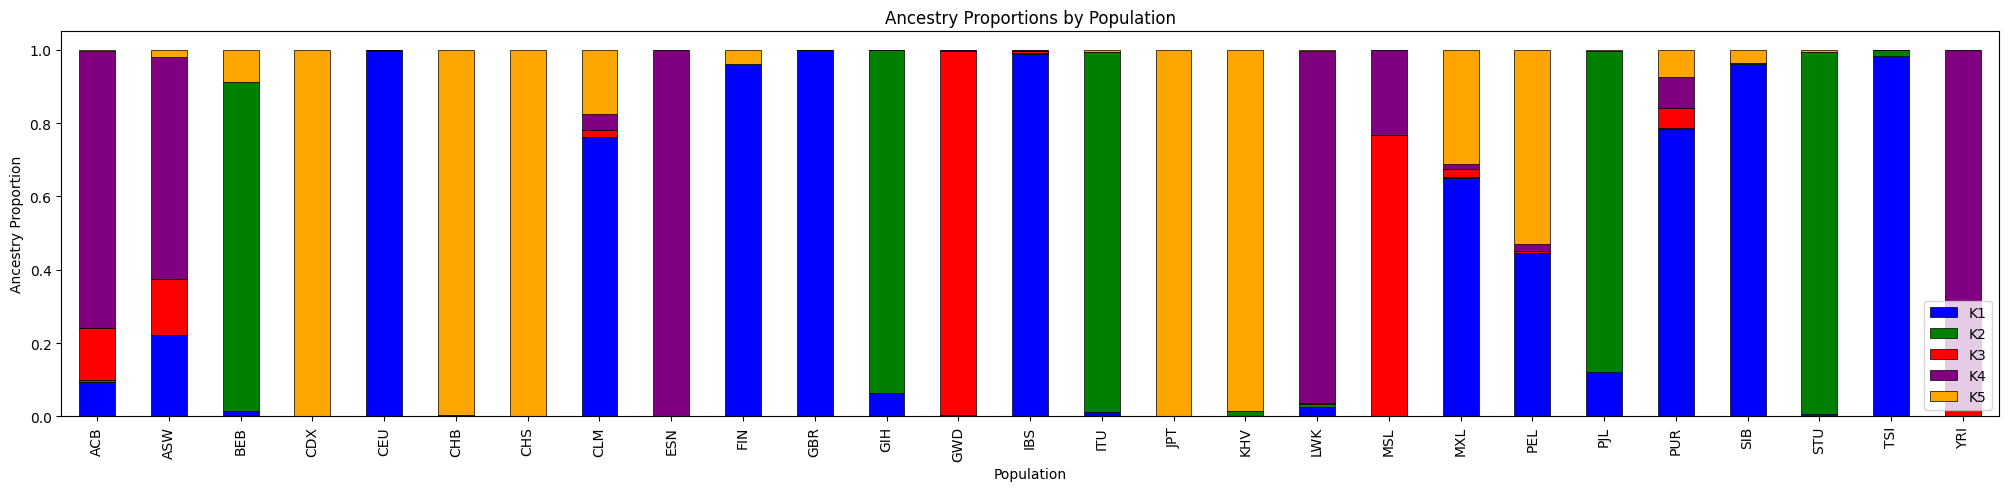

In [86]:
#Create plot for amdixture
average_K_values = q_df.groupby('population')[['K1', 'K2', 'K3', 'K4', 'K5']].mean()
ax = average_K_values.plot(kind='bar', stacked=True, figsize=(25,5), 
                      color=['blue', 'green', 'red', 'purple', 'orange'], 
                      edgecolor='black', linewidth=0.5,
                      title='Ancestry Proportions by Population',
                      xlabel='Population', ylabel='Ancestry Proportion')


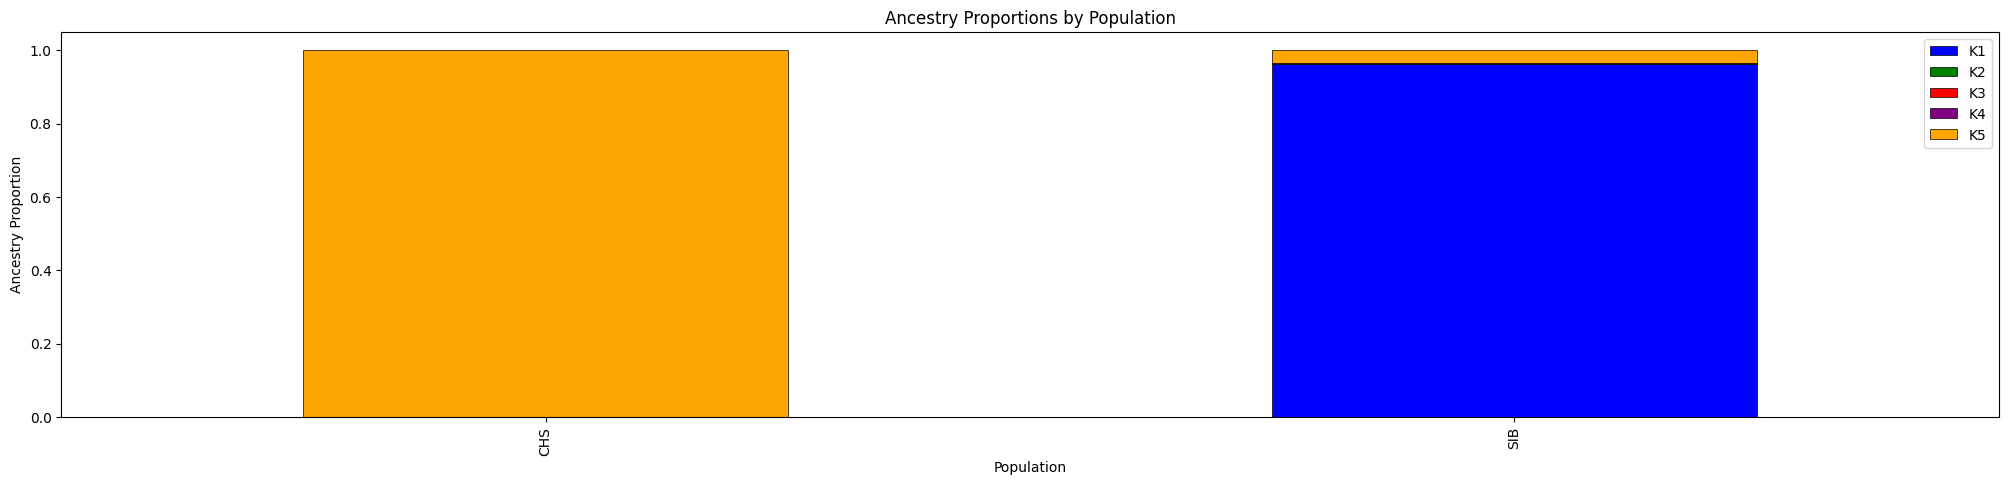

In [85]:
#Create plot for amdixture based on selected population
average_K_values = q_df.groupby('population')[['K1', 'K2', 'K3', 'K4', 'K5']].mean()
population = input('Enter the population name: ').split(',')
filtered_df = average_K_values[average_K_values.index.isin(population)]
ax = filtered_df.plot(kind='bar', stacked=True, figsize=(25,5), 
                      color=['blue', 'green', 'red', 'purple', 'orange'], 
                      edgecolor='black', linewidth=0.5,
                      title='Ancestry Proportions by Population',
                      xlabel='Population', ylabel='Ancestry Proportion')
